# Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Show all columns
pd.set_option("display.max_columns", None)

# 1. Giới thiệu về tập dữ liệu

# 2. Tìm hiểu về tập dữ liệu thô

## 2.1. Đọc tập dữ liệu thô

Xác định trước kiểu dữ liệu cho một số cột đặc biệt:

- Các cột "id" sẽ có kiểu dữ liệu `str` thay vì `int` vì không cần thực hiện phép toán số học trên cột này.
<!-- - Các cột "date" sẽ có kiểu dữ liệu `datetime` thay vì `str` vì cần thực hiện phép toán liên quan đến thời gian. -->

In [2]:
# Define data types for some columns
dtypes = {
    "id": np.object_,
    "video.id": np.object_,
    "video.videoID": np.object_,
    "user.commerceUserInfo.category": np.object_,
    "user.commerceUserInfo.categoryButton": np.object_,
    "BAInfo": np.object_,
    "user.bioLink.link": np.object_,
}

In [4]:
video_df = pd.read_csv("../data/interim/final_raw_videos.csv",
                       dtype=dtypes)
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71260 entries, 0 to 71259
Columns: 174 entries, stats.diggCount to duetInfo.duetFromId
dtypes: float64(88), int64(1), object(85)
memory usage: 94.6+ MB


In [5]:
# # Columns with mixed data types
# video_df.loc[:,video_df.columns[[10,11,167,170]]]

## 2.2. Đếm số hàng và số cột của tập dữ liệu

Chúng ta sẽ kiểm tra kích thước của tập dữ liệu bằng cách sử dụng thuộc tính `shape` của `DataFrame`.

In [6]:
# Get the number of rows and columns in the DataFrame
nrows, ncols = video_df.shape

# Display the number of rows and columns in the DataFrame
print(f"Tập dữ liệu thô có {nrows} hàng và {ncols} cột.")

Tập dữ liệu thô có 71260 hàng và 174 cột.


## 2.3. Ý nghĩa của mỗi hàng trong tập dữ liệu

Mỗi hàng là thông tin thống kê của 1 video trên TikTok.

## 2.4. Mô tả về các cột trong tập dữ liệu

Dưới đây là một số giải thích về ý nghĩa của các cột dữ liệu được crawl từ TikTok thông qua TikTok‑API. Lưu ý rằng không phải tất cả các trường đều có tài liệu chính thức công bố, nên một số giải thích dựa vào cách đặt tên và kinh nghiệm sử dụng API.

---

### 1. Các trường chung về nội dung và quảng cáo

- **AIGCDescription:** Mô tả liên quan đến nội dung do AI tạo ra (AI‑generated content).
- **BAInfo:** Có thể chứa thông tin phân tích, hoặc dữ liệu liên quan đến quảng cáo – thông tin này đôi khi được dùng để phân loại hay gắn nhãn video.
- **CategoryType:** Xác định loại danh mục hoặc chủ đề mà video thuộc về.
- **adAuthorization:** Thông tin xác nhận hoặc cấp quyền liên quan đến quảng cáo.
- **adLabelVersion:** Phiên bản của nhãn quảng cáo, có thể dùng để theo dõi thay đổi hoặc cập nhật từ hệ thống quảng cáo.
- **aigcLabelType:** Loại nhãn liên quan đến nội dung AI, có thể giúp phân biệt giữa nội dung do người tạo ra và nội dung do AI tạo ra.

---

### 2. Thông tin về tác giả (author, authorStats & user)

#### Thông tin chi tiết tài khoản (author và user)

- **author.commentSetting / user.commentSetting:** Cài đặt cho phép hay không cho phép người dùng bình luận trên video của tác giả.
- **author.downloadSetting / user.downloadSetting:** Cài đặt cho phép tải xuống video hay không.
- **author.duetSetting / user.duetSetting:** Cài đặt cho phép thực hiện tính năng duet (hát cùng, ghép video) với video của tác giả.
- **author.ftc / user.ftc:** Có thể liên quan đến tuân thủ quy định của FTC (Ủy ban Thương mại Liên bang) hoặc quy định minh bạch khi quảng bá sản phẩm.
- **author.id / user.id:** ID duy nhất của tài khoản tác giả/người dùng.
- **author.isADVirtual / user.isADVirtual:** Cờ cho biết tài khoản có phải là tài khoản “ảo” phục vụ mục đích quảng cáo hay không.
- **author.isEmbedBanned / user.isEmbedBanned:** Xác định xem nội dung của tài khoản có bị cấm nhúng trên các trang khác hay không.
- **author.nickname / user.nickname:** Tên hiển thị (nickname) của tài khoản.
- **author.openFavorite / user.openFavorite:** Cho biết liệu danh sách video yêu thích có được công khai hay không.
- **author.privateAccount / user.privateAccount:** Cờ cho biết tài khoản được đặt ở chế độ riêng tư hay không.
- **author.relation / user.relation:** Thông tin về mối quan hệ giữa tài khoản của bạn và tài khoản đó (ví dụ: đang theo dõi, bạn bè…).
- **author.roomId / user.roomId:** ID phòng livestream hoặc phòng chat của tài khoản (nếu có).
- **author.secUid / user.secUid:** ID bảo mật duy nhất (một dạng mã hóa riêng) của tài khoản.
- **author.secret / user.secret:** Một cờ hoặc mã bảo mật liên quan đến tài khoản.
- **author.signature / user.signature:** Phần tiểu sử hoặc chữ ký của tài khoản, thường chứa mô tả ngắn về bản thân.
- **author.stitchSetting / user.stitchSetting:** Cài đặt cho phép hay không cho phép thực hiện tính năng “stitch” (ghép nối video).
- **author.uniqueId / user.uniqueId:** Username độc đáo, dùng để định danh công khai tài khoản.
- **user.nickNameModifyTime:** Thời điểm tài khoản thay đổi nickname lần cuối.
- **user.profileEmbedPermission:** Quyền cho phép nhúng nội dung từ trang cá nhân của người dùng.
- **user.profileTab.showPlayListTab / user.profileTab.showQuestionTab:** Cài đặt hiển thị các tab như playlist hoặc Q&A trên trang cá nhân.
- **user.followingVisibility:** Cho biết danh sách người theo dõi hay đang theo dõi của tài khoản có được hiển thị công khai hay không.
- **user.ttSeller:** Cờ xác định xem tài khoản có hoạt động thương mại (bán hàng) trên TikTok hay không.

#### Thống kê của tác giả

- **authorStats.diggCount:** Tổng số lượt “like” (digg) mà tác giả nhận được.
- **authorStats.followerCount:** Số lượng người theo dõi tài khoản.
- **authorStats.followingCount:** Số lượng tài khoản mà tác giả đang theo dõi.
- **authorStats.friendCount:** Số bạn bè (thường là mối quan hệ hai chiều).
- **authorStats.heart / authorStats.heartCount:** Tổng số “trái tim” (lượt thích) mà tài khoản nhận được.
- **authorStats.videoCount:** Số lượng video mà tác giả đã đăng tải.

#### Thông tin liên quan đến thương mại (user.commerceUserInfo)

- **user.commerceUserInfo.category:** Danh mục sản phẩm hoặc dịch vụ nếu tài khoản hoạt động thương mại.
- **user.commerceUserInfo.categoryButton:** Cài đặt hiển thị cho danh mục thương mại (ví dụ: nút truy cập nhanh).
- **user.commerceUserInfo.commerceUser:** Cờ cho biết tài khoản có liên quan đến thương mại hay bán hàng.
- **user.commerceUserInfo.downLoadLink.android / user.commerceUserInfo.downLoadLink.ios:** Đường dẫn tải ứng dụng hoặc sản phẩm dành cho hệ điều hành Android/iOS.

---

### 3. Thông tin và cài đặt liên quan đến video

#### Thông tin chung về video

- **createTime:** Thời gian video được tạo ra (thường là dạng timestamp).
- **desc:** Nội dung mô tả hoặc caption của video.
- **id / video.id / video.videoID:** ID duy nhất của video.
- **digged:** Cho biết video đã được “like” (digg) bởi người dùng truy vấn hay chưa.
- **diversificationId:** ID dùng để đa dạng hóa nội dung trong hệ thống gợi ý.

#### Thống kê và số liệu video

- **stats:** Tập hợp các số liệu thống kê của video, bao gồm:
  - **collectCount:** Số lượt lưu video.
  - **commentCount:** Số lượt bình luận.
  - **diggCount:** Số lượt thích.
  - **heart / heartCount:** Tổng số “trái tim” hoặc lượt thích tích lũy.
  - **playCount:** Số lượt xem.
  - **shareCount:** Số lượt chia sẻ.
  - **videoCount:** (Có thể là số video liên quan, nhưng thông thường số liệu này dành cho tác giả).
- **statsV2:** Phiên bản cập nhật của các chỉ số thống kê, có thể bao gồm thêm:
  - **repostCount:** Số lượt đăng lại video.

#### Thông tin kỹ thuật video

- **video.VQScore:** Điểm chất lượng của video do TikTok tính toán.
- **video.bitrate:** Bitrate của video, phản ánh chất lượng mã hóa.
- **video.definition:** Độ phân giải của video (ví dụ: HD, SD…).
- **video.duration:** Thời lượng video tính bằng giây.
- **video.format:** Định dạng file video (ví dụ: mp4).
- **video.height / video.width:** Chiều cao và chiều rộng tính bằng pixel.
- **video.ratio:** Tỷ lệ khung hình của video.
- **video.codecType:** Loại codec dùng để mã hóa video.
- **video.videoQuality:** Nhãn chất lượng video được xác định bởi hệ thống.

#### Thông tin về âm thanh và phụ đề

- **video.volumeInfo.Loudness:** Độ lớn trung bình của âm thanh trong video.
- **video.volumeInfo.Peak:** Mức âm thanh cực đại trong video.
- **video.claInfo:** Tập hợp thông tin liên quan đến phụ đề và ngôn ngữ, gồm:
  - **captionsType:** Loại phụ đề được sử dụng.
  - **enableAutoCaption:** Cho biết hệ thống có tự động tạo phụ đề hay không.
  - **hasOriginalAudio:** Xác định video có giữ âm thanh gốc hay không.
  - **noCaptionReason:** Lý do không có phụ đề (nếu có).
  - **originalLanguageInfo:** Thông tin về ngôn ngữ gốc, gồm các trường như:
    - **language, languageCode, languageID**
    - **canTranslateRealTimeNoCheck:** Có cho phép dịch theo thời gian thực không cần xác minh hay không.

#### Cài đặt tương tác và bảo mật

- **itemCommentStatus:** Trạng thái cho phép bình luận của video (ví dụ: mở, đóng).
- **itemMute:** Cờ cho biết video có bị tắt tiếng hay không.
- **item_control:** Nhóm cài đặt chi tiết liên quan đến quyền tương tác, bao gồm:
  - **can_comment:** Cho phép người dùng bình luận hay không.
  - **can_creator_redirect:** Cho phép chuyển hướng đến trang cá nhân của người tạo.
  - **can_music_redirect:** Cho phép chuyển hướng đến trang thông tin nhạc.
  - **can_repost:** Cho phép đăng lại (repost) video.
  - **can_share:** Cho phép chia sẻ video ra ngoài.
- **isAd:** Xác định video có phải là quảng cáo không.
- **isECVideo:** Cờ cho biết video có liên quan đến thương mại điện tử không.
- **isPinnedItem:** Xác định video có được ghim lên hồ sơ cá nhân hay không.
- **privateItem / secret:** Cài đặt cho video ở chế độ riêng tư hoặc bảo mật.
- **shareEnabled:** Cho phép chia sẻ video hay không.

#### Các tính năng tương tác đặc biệt

- **duetEnabled / duetDisplay / duetInfo.duetFromId:** Liên quan đến tính năng duet, cho biết:
  - Video có cho phép duet hay không.
  - Cách hiển thị khi thực hiện duet.
  - Nếu là duet, ID của video gốc được duet.
- **stitchEnabled / stitchDisplay:** Tương tự duet nhưng áp dụng cho tính năng “stitch” (ghép nối video).
- **textLanguage / textTranslatable / titleLanguage / titleTranslatable:** Các trường liên quan đến ngôn ngữ của mô tả và tiêu đề video cũng như khả năng tự động dịch.

#### Thời gian và trạng thái thu thập

- **collectTime:** Thời gian mà dữ liệu được thu thập từ TikTok.
- **collected:** Cờ xác nhận rằng dữ liệu đã được thu thập thành công.

#### Các trường dành cho bài đăng hình ảnh (imagePost)

- **imagePost.cover.imageHeight / imagePost.cover.imageWidth:** Kích thước (chiều cao/chiều rộng) của ảnh bìa cho bài đăng hình ảnh.
- **imagePost.shareCover.imageHeight / imagePost.shareCover.imageWidth:** Kích thước của ảnh được sử dụng khi chia sẻ.
- **imagePost.title:** Tiêu đề của bài đăng hình ảnh.

---

### 4. Thông tin về âm nhạc (music)

- **music.album:** Tên album chứa bài nhạc được sử dụng trong video.
- **music.authorName:** Tên của nghệ sĩ hoặc nhà sản xuất âm nhạc.
- **music.coverLarge / coverMedium / coverThumb:** Ảnh bìa của bài nhạc với các kích thước khác nhau.
- **music.duration:** Thời lượng của đoạn nhạc.
- **music.id:** ID duy nhất của bài nhạc.
- **music.isCopyrighted:** Cờ cho biết bài nhạc có được bảo hộ bản quyền hay không.
- **music.original:** Xác định xem bài nhạc có phải là nguyên bản hay không.
- **music.private:** Chỉ định bài nhạc có bị hạn chế truy cập hay không.
- **music.scheduleSearchTime:** Có thể là thời gian xếp lịch để tìm kiếm bài nhạc trong hệ thống.
- **music.title:** Tựa đề của bài nhạc.

---

### 5. Thông tin về POI (Point Of Interest – Địa điểm)

- **poi.address:** Địa chỉ của địa điểm được gắn thẻ trong video.
- **poi.category:** Danh mục hoặc loại địa điểm.
- **poi.city / poi.cityCode:** Tên và mã của thành phố nơi địa điểm đó tọa lạc.
- **poi.country / poi.countryCode:** Tên và mã quốc gia.
- **poi.fatherPoiId / poi.fatherPoiName:** Nếu địa điểm là con của một địa điểm lớn hơn, đây là ID và tên của địa điểm cha.
- **poi.id:** ID duy nhất của địa điểm.
- **poi.name:** Tên của địa điểm.
- **poi.province:** Tỉnh hoặc bang của địa điểm.
- **poi.ttTypeCode, poi.ttTypeNameMedium, poi.ttTypeNameSuper, poi.ttTypeNameTiny:** Các trường mã hóa và phân loại theo tiêu chuẩn của TikTok để xác định loại hình hoặc quy mô của địa điểm.
- **poi.type / poi.typeCode:** Loại địa điểm và mã loại tương ứng.

---

### 6. Các trường khác và theo dõi backend

- **backendSourceEventTracking:** Thông tin dùng để theo dõi các sự kiện từ phía backend của TikTok.
- **brandOrganicType:** Xác định xem video đến từ thương hiệu (official) hay là nội dung tự nhiên (organic).


## 2.5. Lấy 5 điểm dữ liệu ra làm mẫu

Trong phần này, ta sẽ lấy ra ngẫu nhiên 5 mẫu dữ liệu để quan sát. Điều này sẽ giúp ta hiểu rõ hơn về phân bố và giá trị của các cột trong bảng mô tả bên trên. Thông qua đó, ta có thể phát hiện ra các cột "bất thường" và tiến hành xử lý chúng trong các bước phân tích tiếp theo.

In [7]:
# Run this cell multiple times to see the different data samples from the DataFrame
video_df.sample(n=5)

,stats.diggCount,stats.followerCount,stats.followingCount,stats.friendCount,stats.heart,stats.heartCount,stats.videoCount,user.bioLink.risk,user.canExpPlaylist,user.commentSetting,user.commerceUserInfo.category,user.commerceUserInfo.categoryButton,user.commerceUserInfo.commerceUser,user.commerceUserInfo.downLoadLink.android,user.commerceUserInfo.downLoadLink.ios,user.downloadSetting,user.duetSetting,user.followingVisibility,user.ftc,user.id,user.isADVirtual,user.isEmbedBanned,user.nickNameModifyTime,user.nickname,user.openFavorite,user.privateAccount,user.profileEmbedPermission,user.profileTab.showPlayListTab,user.profileTab.showQuestionTab,user.relation,user.secUid,user.secret,user.signature,user.stitchSetting,user.ttSeller,user.uniqueId,user.verified,AIGCDescription,CategoryType,author.commentSetting,author.downloadSetting,author.duetSetting,author.ftc,author.id,author.isADVirtual,author.isEmbedBanned,author.nickname,author.openFavorite,author.privateAccount,author.relation,author.secUid,author.secret,author.signature,author.stitchSetting,author.uniqueId,author.verified,authorStats.diggCount,authorStats.followerCount,authorStats.followingCount,authorStats.friendCount,authorStats.heart,authorStats.heartCount,authorStats.videoCount,backendSourceEventTracking,collected,createTime,desc,digged,diversificationId,duetDisplay,forFriend,id,isAd,isPinnedItem,itemCommentStatus,item_control.can_repost,music.authorName,music.duration,music.id,music.isCopyrighted,music.original,music.private,music.title,officalItem,originalItem,playlistId,privateItem,secret,shareEnabled,stats.collectCount,stats.commentCount,stats.playCount,stats.shareCount,statsV2.collectCount,statsV2.commentCount,statsV2.diggCount,statsV2.playCount,statsV2.repostCount,statsV2.shareCount,stitchDisplay,textLanguage,textTranslatable,video.VQScore,video.bitrate,video.claInfo.captionsType,video.claInfo.enableAutoCaption,video.claInfo.hasOriginalAudio,video.claInfo.originalLanguageInfo.canTranslateRealTimeNoCheck,video.claInfo.originalLanguageInfo.language,video.claInfo.originalLanguageInfo.languageCode,video.claInfo.originalLanguageInfo.languageID,video.codecType,video.definition,video.duration,video.encodeUserTag,video.encodedType,video.format,video.height,video.id,video.ratio,video.videoID,video.videoQuality,video.volumeInfo.Loudness,video.volumeInfo.Peak,video.width,collectTime,duetEnabled,stitchEnabled,video.claInfo.noCaptionReason,adAuthorization,isECVideo,item_control.can_comment,item_control.can_creator_redirect,item_control.can_music_redirect,item_control.can_share,music.album,poi.address,poi.category,poi.city,poi.cityCode,poi.country,poi.countryCode,poi.fatherPoiId,poi.fatherPoiName,poi.id,poi.name,poi.province,poi.ttTypeCode,poi.ttTypeNameMedium,poi.ttTypeNameSuper,poi.ttTypeNameTiny,poi.type,poi.typeCode,music.scheduleSearchTime,aigcLabelType,itemMute,music.coverLarge,music.coverMedium,music.coverThumb,brandOrganicType,imagePost.cover.imageHeight,imagePost.cover.imageWidth,imagePost.shareCover.imageHeight,imagePost.shareCover.imageWidth,imagePost.title,titleLanguage,titleTranslatable,BAInfo,adLabelVersion,maskType,user.bioLink.link,user.roomId,author.roomId,duetInfo.duetFromId
5267,1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,0.0,0.0,0.0,False,7.057113e+18,False,False,Thảo Nguyễn,True,False,0.0,MS4wLjABAAAA94IIrLf3K4kXUoLaVR6udpUeMn_3c4fQbI...,False,Thảo Nguyễn,0.0,thaothao300491,False,9782.0,16000.0,2666.0,0.0,603800.0,603800.0,252.0,NaN,False,1.726815e+09,Làm bánh tráng cuộn sốt me tại nhà chưa bao gi...,False,10040.0,0.0,False,7416612101541711125,False,NaN,0.0,True,AMEE,60.0,7.206015e+18,True,False,False,ưng quá chừng,False,False,NaN,False,False,True,428.0,17.0,62200.0,248.0,428.0,17.0,1907.0,62200.0,0.0,248.0,0.0,vi,True,76.82,1632722.0,NaN,True,True,NaN,NaN,NaN,NaN,h264,540p,49.0,NaN,normal,mp4,1024.0,7416612101541711125,540p,v14044g50000crmhctfog6

# 3. Khám phá và tiền xử lý dữ liệu

## 3.1. Phân tích tỷ lệ trùng lặp (duplicate) và xử lý các hàng trùng lặp (nếu cần thiết)

Để tìm ra các hàng bị trùng lặp, ta sẽ dựa trên thông tin từ 3 cột cho biết ID của video là: `id`, `video.id` và `video.videoID`. Đầu tiên, ta cần kiểm tra xem có bao nhiêu hàng bị thiếu giá trị ở cả 3 cột này.

In [8]:
# Check for missing values in the ID columns
missing_id = video_df["id"].isnull().sum()
missing_video_id = video_df["video.id"].isnull().sum()

# Check if video.videoID column exists
if "video.videoID" in video_df.columns:
    missing_video_videoID = video_df["video.videoID"].isnull().sum()
    print(f"Missing values in 'id': {missing_id}")
    print(f"Missing values in 'video.id': {missing_video_id}")
    print(f"Missing values in 'video.videoID': {missing_video_videoID}")
    
    # Check for rows missing all three IDs
    missing_all = video_df[video_df["id"].isnull() & 
                          video_df["video.id"].isnull() & 
                          video_df["video.videoID"].isnull()]
    print(f"\nRows missing all three ID columns: {len(missing_all)}")
    if len(missing_all) > 0:
        print(f"Percentage: {len(missing_all)/len(video_df)*100:.2f}%")
else:
    print(f"Missing values in 'id': {missing_id}")
    print(f"Missing values in 'video.id': {missing_video_id}")
    print("Column 'video.videoID' doesn't exist in the dataframe")
    
    # Check for rows missing both available IDs
    missing_all = video_df[video_df["id"].isnull() & video_df["video.id"].isnull()]
    print(f"\nRows missing both ID columns: {len(missing_all)}")
    if len(missing_all) > 0:
        print(f"Percentage: {len(missing_all)/len(video_df)*100:.2f}%")

Missing values in 'id': 264
Missing values in 'video.id': 264
Missing values in 'video.videoID': 5910

Rows missing all three ID columns: 264
Percentage: 0.37%


**Nhận xét:**

- Có `264` hàng bị thiếu giá trị ở cả 3 cột `id`, `video.id` và `video.videoID`. Ta sẽ loại bỏ các hàng này khỏi tập dữ liệu.

Loại bỏ các hàng bị thiếu giá trị ở cả 3 cột `id`, `video.id` và `video.videoID`. Sau đó, ta cần reset lại chỉ số của tập dữ liệu để tránh các lỗi có khả năng xảy ra trong quá trình xử lý dữ liệu.

In [9]:
# Remove rows with missing values in all ID columns
# First, let's create a copy of the dataframe to work with
df_cleaned = video_df.copy()

# Check if the rows missing all three IDs are still in the dataframe
if "video.videoID" in df_cleaned.columns:
    mask = df_cleaned["id"].isnull() & df_cleaned["video.id"].isnull() & df_cleaned["video.videoID"].isnull()
else:
    mask = df_cleaned["id"].isnull() & df_cleaned["video.id"].isnull()

# Count how many rows will be removed
rows_to_remove = mask.sum()

# Drop rows with missing values in all ID columns
df_cleaned = df_cleaned[~mask]

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

# Print confirmation
print(f"Trước khi loại bỏ, tập dữ liệu có {len(video_df)} hàng.")
print(f"Đã loại bỏ {rows_to_remove} hàng thiếu giá trị ở tất cả các cột ID.")
print(f"Tập dữ liệu sau khi loại bỏ có {len(df_cleaned)} hàng.")

# Update our main dataframe
video_df = df_cleaned

Trước khi loại bỏ, tập dữ liệu có 71260 hàng.
Đã loại bỏ 264 hàng thiếu giá trị ở tất cả các cột ID.
Tập dữ liệu sau khi loại bỏ có 70996 hàng.


Ta sử dụng phương thức `duplicated()` của `DataFrame` để kiểm tra xem có hàng nào xuất hiện nhiều hơn một lần hay không. Ta sẽ dùng giá trị của cột `video.id` để xác định các hàng trùng lặp. _Trong trường hợp có từ 2 hàng "giống nhau" trở lên, thì hàng đầu tiên sẽ không bị xem là trùng lặp (ta dùng tham số `keep='first'`)_.


In [10]:
# Calculate the number of duplicated rows in the DataFrame
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
num_duplicated_rows = video_df.duplicated(
    subset="video.id", keep="first").sum()
# Calculate the duplicated rate
duplicated_rate = num_duplicated_rows / nrows * 100

# Display the number of duplicated rows in the DataFrame
if num_duplicated_rows == 0:
    print("Dữ liệu không có hàng nào bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} hàng bị trùng lặp.")

# Display the duplicated rate
print(f"Suy ra, tỉ lệ hàng bị trùng lặp là {duplicated_rate:.2f}%.")

Dữ liệu không có hàng nào bị trùng lặp!
Suy ra, tỉ lệ hàng bị trùng lặp là 0.00%.


**Kết quả:**

```txt
Dữ liệu không có hàng nào bị trùng lặp!
Suy ra, tỉ lệ hàng bị trùng lặp là 0.00%.
```


**Nhận xét:**

- Từ kết quả kiểm tra, ta thấy rằng **không có hàng nào bị trùng lặp** trong tập dữ liệu thô, hay tỷ lệ trùng lặp bằng 0%. Vì mỗi hàng đại diện cho một tỷ phú cụ thể, việc không có hàng trùng lặp là một dấu hiệu tốt cho chất lượng của dữ liệu. Điều này giúp ta tiết kiệm thời gian và công sức trong việc xử lý dữ liệu.


## 3.2. Phân tích tỷ lệ thiếu giá trị ở mỗi cột (missing rate)

Ta sử dụng phương thức `isnull()` của `DataFrame` để kiểm tra xem có hàng nào trong mỗi cột bị thiếu giá trị hay không. Từ đó ta sẽ tính được tỷ lệ thiếu giá trị của mỗi cột. Ta đồng thời sắp xếp các cột theo tỷ lệ thiếu giá trị giảm dần để dễ dàng quan sát. Toàn bộ quy trình này sẽ được thực hiện thông qua hàm `missing_values_table()`.


In [11]:
def display_missing_statistics(df: pd.DataFrame):
    """ Helper function to display the missing values count
    and rate for each column in the DataFrame

    Args:
        df (pd.DataFrame): The input DataFrame

    Returns:
        pd.io.formats.style.Styler: 
        The missing values count and rate for each column
        in the DataFrame
    """

    # Count the number of missing values in each column
    missing_df = (
        df.isnull().sum()
          .to_frame(name="Missing Values Count")
          .reset_index(names="Column Name")
    )

    # Sort the columns by the number of missing values
    missing_df = missing_df.sort_values(
        by="Missing Values Count",
        ascending=False
    )

    # Calculate the missing rate for each column
    missing_df["Missing Rate (Percent)"] = \
        missing_df["Missing Values Count"] / len(df) * 100

    # Display the missing values count and rate for each column
    # Hide the index for better visualization
    return missing_df.style.hide()

Khi này, ta gọi hàm `missing_values_table()` để phân tích tỷ lệ thiếu giá trị của các cột trong tập dữ liệu.

In [12]:
# # Get the LaTeX representation of the missing values count and rate
# # for each column in the DataFrame
# clipboard.copy(display_missing_statistics(df).to_latex())

In [13]:
# Display the missing values count and rate
# for each column in the DataFrame
display_missing_statistics(video_df)

Column Name,Missing Values Count,Missing Rate (Percent)
stats.followerCount,70996,100.000000
stats.followingCount,70996,100.000000
stats.heart,70996,100.000000
stats.friendCount,70996,100.000000
stats.heartCount,70996,100.000000
stats.videoCount,70996,100.000000
user.commerceUserInfo.category,70996,100.000000
user.bioLink.risk,70996,100.000000
user.canExpPlaylist,70996,100.000000
user.commentSetting,70996,100.000000


**Nhận xét:**

- Dựa trên kết quả phân tích dữ liệu, ta thấy rất nhiều cột có **tỷ lệ thiếu giá trị khá cao** (trên 70%). Đây là các cột không đủ chất lượng để sử dụng trong quá trình phân tích, nên ta sẽ loại bỏ các cột này khỏi tập dữ liệu.


Loại bỏ các cột có tỷ lệ thiếu giá trị trên 70% khỏi tập dữ liệu. Sau đó, ta cần reset lại chỉ số của tập dữ liệu để tránh các lỗi có khả năng xảy ra trong quá trình xử lý dữ liệu.

In [14]:
# Find columns with missing rate greater than 70%
missing_rate_threshold = 70
missing_rate_mask = video_df.isnull().mean() * 100 > missing_rate_threshold
columns_missing_above_threshold = video_df.columns[missing_rate_mask]
print(f"Có {len(columns_missing_above_threshold)} cột có tỉ lệ giá trị thiếu lớn hơn {missing_rate_threshold}%.")

Có 76 cột có tỉ lệ giá trị thiếu lớn hơn 70%.


In [15]:
# Get the number of columns before dropping
n_cols_before = video_df.shape[1]

# Drop columns with missing rate greater than 70%
video_df = video_df.drop(columns=columns_missing_above_threshold,
                         axis=1, errors="ignore")

# Print confirmation
print(f"Trước khi loại bỏ, tập dữ liệu có {n_cols_before} cột.")
print(f"Đã loại bỏ {len(columns_missing_above_threshold)} cột có tỉ lệ giá trị thiếu lớn hơn {missing_rate_threshold}%.")
print(f"Tập dữ liệu sau khi loại bỏ có {video_df.shape[1]} cột.")

Trước khi loại bỏ, tập dữ liệu có 174 cột.
Đã loại bỏ 76 cột có tỉ lệ giá trị thiếu lớn hơn 70%.
Tập dữ liệu sau khi loại bỏ có 98 cột.


## 3.3. Loại bỏ các cột không có nhiều ý nghĩa trong quá trình phân tích

Cả 3 cột `id`, `video.id` và `video.videoID` đều là các cột ID duy nhất của video, nên ta sẽ loại bỏ 2 trong 3 cột này khỏi tập dữ liệu. Ta sẽ giữ lại cột `video.id` để đại diện cho ID của video.

In [16]:
# Drop video_id column
video_id_cols = ["id", "video.videoID"]
video_df = video_df.drop(columns=video_id_cols, axis=1, errors="ignore")

Vì các cột có tên bắt đầu với `stats.*` chứa cùng thông tin với các cột có tên bắt đầu với `statsV2.*`, nhưng không có thông tin về `repostCount` như `statsV2.*`. Nên ta sẽ loại bỏ các cột có tên bắt đầu với `stats.*`.


In [24]:
# Remove columns starting with "stats."
stats_cols = video_df.columns[video_df.columns.str.startswith("stats.")]
video_df = video_df.drop(columns=stats_cols, axis=1, errors="ignore")

## 3.4. Phân tích phân bố của các giá trị trong mỗi cột có kiểu dữ liệu dạng số (numerical)

Với mỗi cột có kiểu dữ liệu dạng số, ta sẽ tính:

- Tỷ lệ thiếu giá trị (từ 0 đến 100).
- Giá trị tối thiểu.
- Giá trị tứ phân vị thứ nhất.
- Giá trị tứ phân vị thứ hai (giá trị trung vị).
- Giá trị tứ phân vị thứ ba.
- Giá trị tối đa.


In [27]:
# Some helper functions to calculate
# the missing ratio, median, lower quartile, and upper quartile
def missing_ratio(s):
    return (s.isna().mean() * 100).round(3)


def median(df):
    return (df.quantile(0.5)).round(1)


def lower_quartile(df):
    return (df.quantile(0.25)).round(1)


def upper_quartile(df):
    return (df.quantile(0.75)).round(1)


def display_numerical_columns_statistics(num_col_df: pd.DataFrame):
    """ Display the summary statistics for numerical columns in the DataFrame

    Args:
        num_col_df (pd.DataFrame): The DataFrame containing numerical columns

    Returns:
        pd.io.formats.style.Styler: The summary statistics for numerical columns
    """

    # Calculate some basic statistics for the numerical columns:
    # Missing ratio, minimum, lower quartile, median, upper quartile, and maximum
    num_col_info_df = num_col_df.aggregate(
        [missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

    # Transpose the DataFrame for better visualization
    num_col_info_df = num_col_info_df.T

    # Rename the columns for better interpretation
    num_col_info_df.columns = [
        "Missing Ratio (Percent)", "Minimum",
        "Lower Quartile (Q1)", "Median (Q2)",
        "Upper Quartile (Q3)", "Maximum"
    ]

    # Display the basic statistics for the numerical columns
    return num_col_info_df.reset_index(names="Column Name").style.format({
        "Missing Ratio (Percent)": "{:.3f}",
        "Minimum": "{:.1f}",
        "Lower Quartile (Q1)": "{:.1f}",
        "Median (Q2)": "{:.1f}",
        "Upper Quartile (Q3)": "{:.1f}",
        "Maximum": "{:.1f}"
    }).hide()

**Kết quả:**

In [28]:
# Extract the numerical columns from the DataFrame
num_col_df = video_df.select_dtypes(include=[np.number])

In [29]:
# # Get the LaTeX representation of the summary statistics
# # for numerical columns in the DataFrame
# clipboard.copy(display_numerical_columns_statistics(num_col_df).to_latex())

# Display the summary statistics for numerical columns
display_numerical_columns_statistics(num_col_df)

Column Name,Missing Ratio (Percent),Minimum,Lower Quartile (Q1),Median (Q2),Upper Quartile (Q3),Maximum
CategoryType,0.000,0.0,111.0,111.0,111.0,120.0
author.commentSetting,0.000,0.0,0.0,0.0,0.0,0.0
author.downloadSetting,0.000,0.0,0.0,0.0,0.0,3.0
author.duetSetting,0.000,0.0,0.0,0.0,0.0,3.0
author.id,0.000,15475469.0,6806417388361516032.0,7039230412157699072.0,7242697458664457216.0,7448123058181260288.0
author.relation,0.000,0.0,0.0,0.0,0.0,0.0
author.stitchSetting,0.000,0.0,0.0,0.0,0.0,3.0
authorStats.diggCount,0.000,16.0,1188.0,4259.0,11100.0,173000.0
authorStats.followerCount,0.000,0.0,82300.0,199900.0,381100.0,3000000.0
authorStats.followingCount,0.000,0.0,26.0,79.0,241.0,9398.0


Vẽ biểu đồ phân phối của các cột dạng số.

In [30]:
num_col_df.shape[1]

41

In [ ]:
# Create subplots for numerical columns
fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(20, 15))
axes = axes.ravel()

# Plot distribution for each numerical column
for idx, column in enumerate(num_col_df.columns):
    # Create distribution plot
    sns.histplot(data=num_col_df, x=column, kde=True, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {column}")
    axes[idx].tick_params(axis="x", rotation=45)

# Remove empty subplots
for idx in range(len(num_col_df.columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

**Nhận xét:**

- ...


## 3.5. Phân tích phân bố của các giá trị trong mỗi cột có kiểu dữ liệu không phải dạng số (non-numerical)

Với mỗi cột có kiểu dữ liệu không phải dạng số, ta sẽ tính:

- Tỷ lệ thiếu giá trị (từ 0 đến 100).
- Số lượng các giá trị khác nhau.
- Tỷ lệ xuất hiện (từ 0 đến 100) của mỗi giá trị.


In [ ]:
# Some helper functions to calculate
# the missing ratio, number of unique values, and value ratios
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)


def num_values(s):
    return len(s.value_counts())


def value_ratios(s):
    # Calculate the value ratios for each unique value in the Series
    total_count = (~s.isna()).sum()
    ratios = (s.value_counts() / total_count * 100).round(1)

    # Convert the index to string for better display
    ratios.index = ratios.index.astype(str)

    return ratios.to_dict()


def display_non_numerical_columns_statistics(non_num_col_df: pd.DataFrame):
    """ Display the summary statistics for non-numerical columns in the DataFrame

    Args:
        non_num_col_df (pd.DataFrame): The DataFrame containing non-numerical columns

    Returns:
        pd.io.formats.style.Styler: The summary statistics for non-numerical columns
    """

    # Calculate the missing ratio, number of unique values, and value ratios
    # for each non-numerical column
    non_num_col_info_df = non_num_col_df.aggregate(
        [missing_ratio, num_values, value_ratios])

    # Transpose the DataFrame for better visualization
    non_num_col_info_df = non_num_col_info_df.T

    # Rename the columns for better interpretation
    non_num_col_info_df.columns = [
        "Missing Ratio (Percent)", "Number of Unique Values", "Value Ratios"
    ]

    # Display the basic statistics for the non-numerical columns
    # Only show first 5 values in column "Value Ratios"
    return non_num_col_info_df.reset_index(names="Column Name").style.format({
        "Missing Ratio (Percent)": "{:.1f}",
        "Number of Unique Values": "{:,.0f}",
        "Value Ratios": lambda x: dict(list(x.items())[:6])
    }).hide()

**Kết quả:**

In [ ]:
# Extract non-numerical columns from the DataFrame
non_num_col_df = video_df.select_dtypes(exclude=[np.number, np.datetime64])

In [ ]:
# # Get the LaTeX representation of the summary statistics
# # for non-numerical columns in the DataFrame
# clipboard.copy(display_non_numerical_columns_statistics(non_num_col_df).to_latex())

# Display the summary statistics for non-numerical columns
display_non_numerical_columns_statistics(non_num_col_df)

Column Name,Missing Ratio (Percent),Number of Unique Values,Value Ratios
category,0.0,18,"{'Finance & Investments': 14.1, 'Manufacturing': 12.3, 'Technology': 11.9, 'Fashion & Retail': 10.1, 'Food & Beverage': 8.0, 'Healthcare': 7.6}"
personName,0.0,"2,638","{'Wang Yanqing & family': 0.1, 'Li Li': 0.1, 'Kim Chang-soo': 0.0, 'Kim Jung-min': 0.0, 'Kim Jung-youn': 0.0, 'Mustafa Kucuk': 0.0}"
country,1.4,78,"{'United States': 29.0, 'China': 20.1, 'India': 6.0, 'Germany': 3.9, 'United Kingdom': 3.2, 'Russia': 3.0}"
city,2.7,741,"{'New York': 3.9, 'Hong Kong': 2.6, 'Beijing': 2.6, 'Shanghai': 2.5, 'London': 2.4, 'Moscow': 2.3}"
source,0.0,906,"{'Real estate': 5.7, 'Investments': 3.5, 'Diversified': 3.4, 'Pharmaceuticals': 3.2, 'Software': 2.4, 'Hedge funds': 1.6}"
industries,0.0,18,"{'Finance & Investments': 14.1, 'Manufacturing': 12.3, 'Technology': 11.9, 'Fashion & Retail': 10.1, 'Food & Beverage': 8.0, 'Healthcare': 7.6}"
countryOfCitizenship,0.0,77,"{'United States': 27.8, 'China': 18.6, 'India': 6.4, 'Germany': 4.8, 'Russia': 3.9, 'Hong Kong': 2.6}"
organization,87.7,294,"{'Meta Platforms': 1.2, 'Gap Inc.': 0.9, 'Kingston Technology Corporation': 0.6, 'Airbnb, Inc.': 0.6, 'Oaktree Capital Group LLC': 0.6, 'Alphabet': 0.6}"
selfMade,0.0,2,"{'True': 68.6, 'False': 31.4}"
status,0.0,6,"{'D': 46.3, 'U': 32.4, 'E': 10.2, 'N': 5.7, 'Split Family Fortune': 3.0, 'R': 2.5}"


Vẽ biểu đồ phân phối của các cột dạng không số.

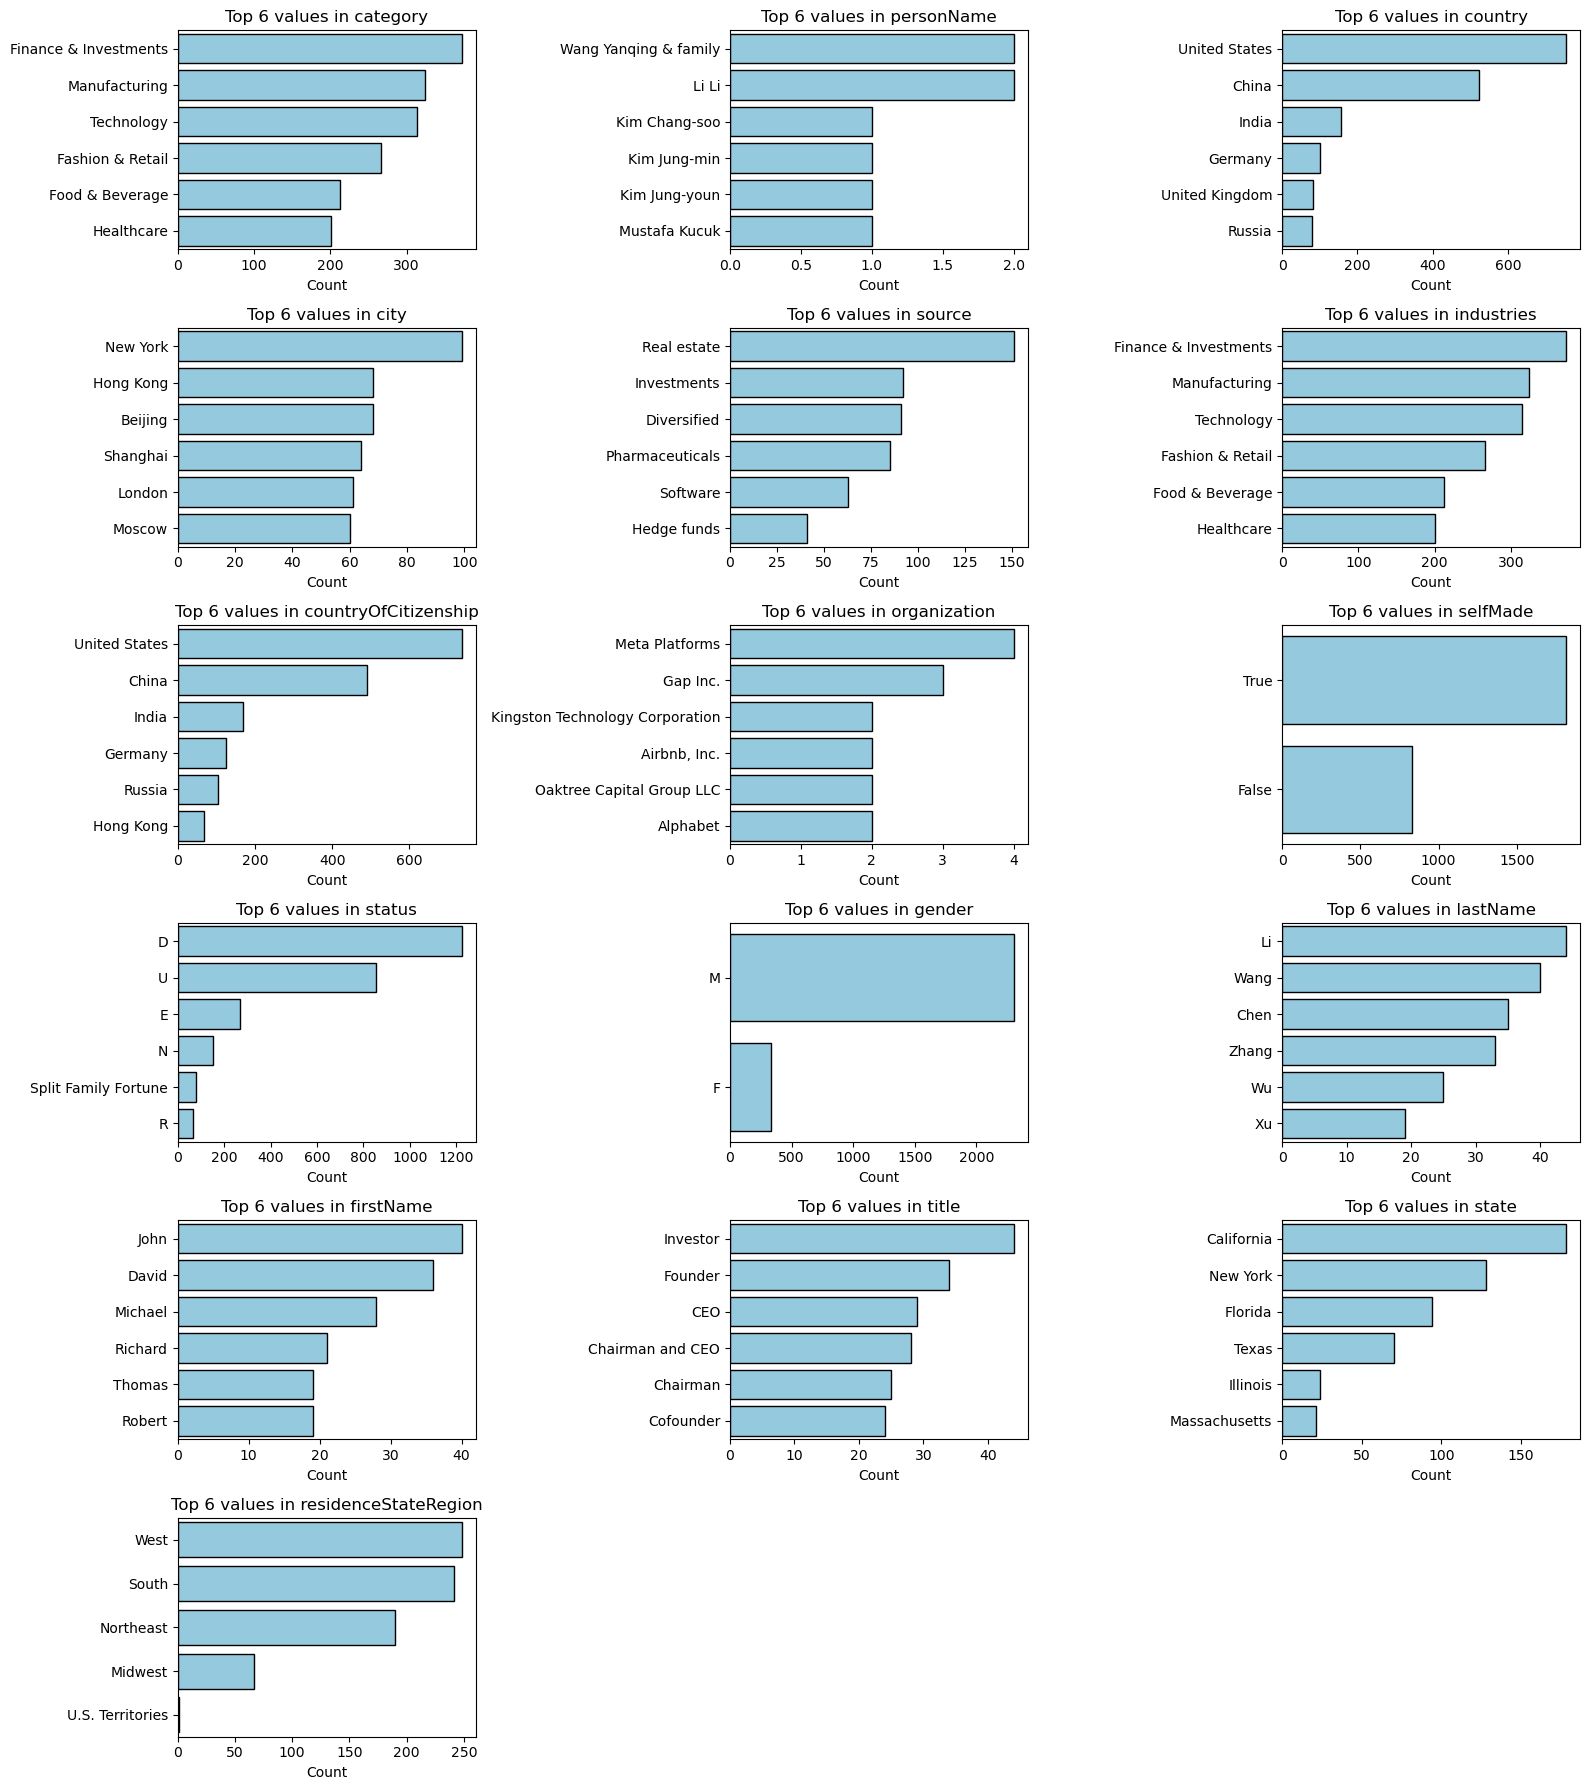

In [ ]:
# Create subplots for non-numerical columns
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 18))
axes = axes.ravel()

# Plot count plot for each non-numerical column
# Only show top 6 values in the count plot
for idx, column in enumerate(non_num_col_df.columns):
    # Only keep top 6 values
    value_counts = non_num_col_df[column].value_counts()[:6]
    # Convert index to string for consistent display
    value_counts.index = value_counts.index.astype(str)

    # Create horizontal bar plot
    sns.barplot(x=value_counts.values, y=value_counts.index,
                ax=axes[idx], orient="h",
                color="skyblue", edgecolor="black")
    axes[idx].set_title(f"Top 6 values in {column}")
    axes[idx].set_xlabel("Count")
    axes[idx].set_ylabel("")

# Remove empty subplots
for idx in range(len(non_num_col_df.columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()

**Nhận xét:**

Dựa trên bảng thống kê và biểu đồ phân bố của các giá trị không phải số, ta có thể rút ra một số nhận xét như sau:

1. **Phân bố ngành nghề và lĩnh vực hoạt động (category, industries):**

   - Cả hai cột đều có 18 giá trị duy nhất với tỷ lệ xuất hiện của các ngành khá tương đồng.

   - "Finance & Investments" chiếm tỷ lệ cao nhất (14.1%), theo sau là "Manufacturing" (12.3%) và "Technology" (11.9%).

   - Điều này cho thấy các ngành tài chính, sản xuất và công nghệ đóng vai trò chủ đạo trong việc tạo ra của cải cho các tỷ phú.

2. **Thông tin cá nhân (personName, firstName, lastName):**

   - Cột personName có 2.638 giá trị duy nhất cho thấy mức độ đa dạng rất lớn về danh tính.

   - Trong khi đó, các cột firstName và lastName cũng cho thấy sự phong phú của tên gọi; ví dụ, các họ phổ biến như "Li", "Wang", "Chen", "Zhang" cho thấy sự hiện diện mạnh mẽ của các tỷ phú có gốc Trung Quốc hoặc từ khu vực châu Á.

3. **Phân bố quốc gia và thành phố (country, countryOfCitizenship, city):**

   - Quốc gia: Dữ liệu có 78 giá trị duy nhất với "United States" (29.0%) và "China" (20.1%) chiếm tỷ lệ lớn, cho thấy hai nền kinh tế này là trung tâm của sự tập trung của cải.

   - Quốc tịch: Tương tự, cột countryOfCitizenship cho thấy Mỹ (27.8%) và Trung Quốc (18.6%) dẫn đầu.

   - Thành phố: Với 741 giá trị duy nhất, các thành phố nổi bật như New York, Hong Kong, Beijing, Shanghai, London và Moscow xuất hiện với tỷ lệ khoảng 2.3% đến 3.9%, cho thấy các trung tâm tài chính - kinh tế lớn luôn là nơi tập trung của cải.

4. **Nguồn gốc của cải (source):**

   - Cột này có 906 giá trị duy nhất.

   - "Real estate" chiếm tỷ lệ cao nhất (5.7%), theo sau là "Investments" (3.5%) và "Diversified" (3.4%), cho thấy bất động sản và các khoản đầu tư tài chính là những nguồn tạo ra của cải quan trọng.

5. **Tỷ lệ tỷ phú tự thân so với thừa kế (selfMade, status):**

   - 68.6% các tỷ phú là tự tạo ra tài sản (selfMade = True) so với 31.4% thừa kế, điều này phản ánh xu hướng khởi nghiệp mạnh mẽ trong việc tạo dựng của cải.

   - Cột status với 6 giá trị cho thấy nhóm "D" (self-made, thường là nhà sáng lập/doanh nhân) chiếm 46.3%, tiếp theo là "U" (thừa kế) với 32.4%. Các nhóm còn lại có tỷ lệ thấp hơn, thể hiện những đặc thù riêng của nguồn gốc giàu có.

6. **Giới tính (gender):**

   - Dữ liệu thể hiện sự mất cân đối rõ rệt khi 87.2% các tỷ phú là nam và chỉ 12.8% là nữ, cho thấy sự chênh lệch đáng kể về giới trong giới tỷ phú.

7. **Thông tin tổ chức và chức danh (organization, title):**

   - Cột organization có tỷ lệ thiếu cực cao (87.7%), cho thấy phần lớn hồ sơ không cung cấp thông tin về tổ chức liên quan - có thể do vấn đề bảo mật hoặc dữ liệu không đầy đủ.

   - Tương tự, cột title cũng có tỷ lệ thiếu cao (87.2%), nhưng với dữ liệu có sẵn, các chức danh như "Investor", "Founder", "CEO" chiếm tỷ lệ cao (tương ứng 13.0%, 10.0%, 8.6%), phản ánh vai trò lãnh đạo và tầm quan trọng của các chức danh này đối với các tỷ phú.

8. **Thông tin địa phương của Mỹ (state, residenceStateRegion):**

   - Hai cột này có tỷ lệ thiếu khá lớn (71.5% và 71.7%) vì chỉ áp dụng cho các hồ sơ liên quan đến Mỹ.

   - Trong số dữ liệu có sẵn, các bang như California (23.6%), New York (17.0%), Florida (12.5%) và Texas (9.3%) là những địa phương phổ biến, trong khi về vùng, "West" (33.2%) và "South" (32.3%) chiếm ưu thế.

**Kết luận:**

- **Tập trung ngành nghề:**  
   Các ngành tài chính, sản xuất và công nghệ là những lĩnh vực tạo ra của cải hàng đầu, cho thấy xu hướng đầu tư và phát triển kinh doanh hiện đại.

- **Sự tập trung địa lý:**  
   Mỹ và Trung Quốc là hai quốc gia chính, với các thành phố tài chính lớn đóng vai trò trung tâm, phản ánh vai trò then chốt của những nền kinh tế này trong việc tích lũy của cải.

- **Nguồn gốc giàu có:**  
   Xu hướng tự tạo ra của cải chiếm ưu thế, mặc dù vẫn có một tỷ lệ đáng kể của những người thừa kế, từ đó nhấn mạnh tầm quan trọng của khả năng khởi nghiệp và đổi mới sáng tạo.

- **Phân bố giới tính không đồng đều:**  
  Đáng chú ý là sự mất cân đối về giới, khi mà các tỷ phú nam chiếm đa số áp đảo so với tỷ phú nữ.

- **Thông tin không đầy đủ:**  
   Một số cột như organization và title có tỷ lệ thiếu dữ liệu rất cao, điều này gợi ý cần cải thiện chất lượng thu thập dữ liệu hoặc có thể do tính chất bảo mật của thông tin liên quan đến các tỷ phú.

- **Đặc điểm tên gọi:**  
  Sự đa dạng trong tên và họ, cùng với sự xuất hiện của các họ phổ biến từ châu Á như "Li", "Wang" và "Chen", cho thấy sự góp mặt đáng kể của các tỷ phú gốc châu Á trong dữ liệu.


In [1]:
# a = video_df["author.uniqueId"].astype(str)
# b = video_df["video.id"].astype(str)
# row_id = 50_000
# username = a[row_id]
# video_id = b[row_id]
# # url = video_df["author.uniqueId"] + video_df["video.id"]
# url = f"https://www.tiktok.com/@{username}/video/{video_id}"
# url

## List all columns in the dataset

In [18]:
video_df.sample(5)

,stats.diggCount,CategoryType,author.commentSetting,author.downloadSetting,author.duetSetting,author.ftc,author.id,author.isADVirtual,author.isEmbedBanned,author.nickname,author.openFavorite,author.privateAccount,author.relation,author.secUid,author.secret,author.signature,author.stitchSetting,author.uniqueId,author.verified,authorStats.diggCount,authorStats.followerCount,authorStats.followingCount,authorStats.friendCount,authorStats.heart,authorStats.heartCount,authorStats.videoCount,collected,createTime,desc,digged,diversificationId,duetDisplay,forFriend,isAd,itemCommentStatus,item_control.can_repost,music.authorName,music.duration,music.id,music.isCopyrighted,music.original,music.private,music.title,officalItem,originalItem,privateItem,secret,shareEnabled,stats.collectCount,stats.commentCount,stats.playCount,stats.shareCount,statsV2.collectCount,statsV2.commentCount,statsV2.diggCount,statsV2.playCount,statsV2.repostCount,statsV2.shareCount,stitchDisplay,textLanguage,textTranslatable,video.VQScore,video.bitrate,video.claInfo.captionsType,video.claInfo.enableAutoCaption,video.claInfo.hasOriginalAudio,video.claInfo.originalLanguageInfo.canTranslateRealTimeNoCheck,video.claInfo.originalLanguageInfo.language,video.claInfo.originalLanguageInfo.languageCode,video.claInfo.originalLanguageInfo.languageID,video.codecType,video.definition,video.duration,video.encodedType,video.format,video.height,video.id,video.ratio,video.videoQuality,video.volumeInfo.Loudness,video.volumeInfo.Peak,video.width,collectTime,duetEnabled,stitchEnabled,poi.address,poi.category,poi.cityCode,poi.countryCode,poi.id,poi.name,poi.ttTypeCode,poi.ttTypeNameMedium,poi.ttTypeNameSuper,poi.ttTypeNameTiny,poi.type
52593,139,0.0,0.0,0.0,0.0,False,7.009857e+18,False,False,VỪ THỊ XIA,False,False,0.0,MS4wLjABAAAA2coJQBXf3kSW0kmJa5EphR0mwqVixoWj2E...,False,Ac mua GÀ ĐEN bấm GỌI ở đây 📞,0.0,vuthixia888,False,4887.0,82300.0,336.0,0.0,1200000.0,1200000.0,462.0,False,1.737641e+09,Săn mây #mỡlợn #thitmo #ancungtitkok #lond...,False,NaN,0.0,False,False,0.0,True,VỪ THỊ XIA,41.0,7.463110e+18,False,True,False,nhạc nền - VỪ THỊ XIA,False,False,False,False,True,14.0,3.0,8616.0,0.0,14.0,3.0,139.0,8616.0,0.0,0.0,0.0,vi,True,61.97,1302266.0,1.0,True,True,True,vie-VN,vi,10.0,h264,540p,41.0,normal,mp4,1024.0,7463109215318543623,540p,normal,-28.4,0.44157,576.0,1.742378e+09,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30125,671,111.0,0.0,0.0,0.0,False,7.292189e+18,False,False,Chiếc bụng mỡ,False,False,0.0,MS4wLjABAAAAwTF8LQgvzbhFWNpEwRPp8NzzX4Ewe6waHc...,False,Ăn cả thế rới 🤰🏿\nFor work : 0 9 7 2. 9 8 7. 5...,0.0,chiecbungmo97,False,5350.0,276300.0,67.0,0.0,8200000.0,8200000.0,536.0,False,1.704277e+09,Tui quên set âm thanh phải up lại nè #eating #...,False,10042.0,0.0,False,False,0.0,True,wp,88.0,7.098927e+18,False,True,False,em không hiểu speed songs by wipwpoo,False,False,False,False,True,129.0,6.0,31500.0,13.0,129.0,6.0,671.0,31500.0,0.0,13.0,0.0,vi,True,77.39,1305322.0,1.0,True,True,True,vie-VN,vi,10.0,h264,540p,40.0,normal,mp4,1024.0,7319814218096626945,540p,normal,-26.7,0.97724,576.0,1.742378e+09,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40197,65200,111.0,0.0,0.0,0.0,False,6.563937e+18,False,False,KIM KHÁNH NÈ 🍜,False,False,0.0,MS4wLjABAAAA188zAxnP_IFY67duD9x3GGRZpZCKCYrLrX...,False,❗KHÔNG ACC PHỤ❗️\nChỉ liên hệ:\nKhanh.nnk1406@...,0.0,vitaminkk,False,1350.0,1900000.0,16.0,0.0,90400000.0,90400000.0,647.0,False,1.718705e+09,Ăn ít mà ăn buffet bò tươi sao cho hờiii 🤤 #an...,False,10085.0,0.0,False,False,0.0,True,Sound Owl,88.0,6.817143e+18,False,False,False,[Animals and dishes] Cute BGM,False,False,False,False,True,6957.0,668.0,1400000.0,6204.0,6957.0,668.0,65200.0,1400000.0,0.0,6204.0,0.0,vi,True,66.74,2498750.0,1.0,True,True,True,vie-VN,vi,10.0,h264,540p,95.0,normal,mp4,1024.0,7381780596688751873,540p,normal,-5.5,1.00000,576.0,1.742378e+09,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15472,3211,111.0,0.0,0.0,0.0,False,7.248831e+18,False,False,Ăn Đi Vy Ơ

In [26]:
video_df["collected"].value_counts(dropna=False)

collected
False    70996
Name: count, dtype: int64

In [25]:
# Sort column names
all_cols = video_df.columns
sorted_cols = sorted(all_cols)

for col in sorted_cols:
    # # Print column name and missing rate
    # missing_rate = video_df[col].isnull().mean()
    # print(f"{col:40}: {missing_rate:.1%}")
    
    # Print column name
    print(col)

CategoryType
author.commentSetting
author.downloadSetting
author.duetSetting
author.ftc
author.id
author.isADVirtual
author.isEmbedBanned
author.nickname
author.openFavorite
author.privateAccount
author.relation
author.secUid
author.secret
author.signature
author.stitchSetting
author.uniqueId
author.verified
authorStats.diggCount
authorStats.followerCount
authorStats.followingCount
authorStats.friendCount
authorStats.heart
authorStats.heartCount
authorStats.videoCount
collectTime
collected
createTime
desc
digged
diversificationId
duetDisplay
duetEnabled
forFriend
isAd
itemCommentStatus
item_control.can_repost
music.authorName
music.duration
music.id
music.isCopyrighted
music.original
music.private
music.title
officalItem
originalItem
poi.address
poi.category
poi.cityCode
poi.countryCode
poi.id
poi.name
poi.ttTypeCode
poi.ttTypeNameMedium
poi.ttTypeNameSuper
poi.ttTypeNameTiny
poi.type
privateItem
secret
shareEnabled
statsV2.collectCount
statsV2.commentCount
statsV2.diggCount
statsV2.pl

## Check missing data

In [5]:
# Check missing ratio of each column
missing_ratio = video_df.isnull().sum() / len(video_df)
missing_ratio = missing_ratio[missing_ratio > 0]
missing_ratio = missing_ratio.sort_values(ascending=False)

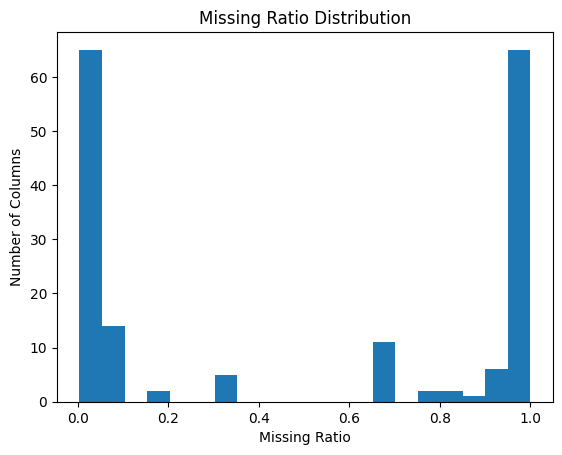

In [16]:
plt.hist(missing_ratio, bins=20)
plt.xlabel("Missing Ratio")
plt.ylabel("Number of Columns")
plt.title("Missing Ratio Distribution")
plt.show()

Drop columns with missing rate > 60%

In [ ]:
# Drop columns with missing rate > 60%
columns_to_drop = missing_ratio[missing_ratio > 0.6].index
video_df = video_df.drop(columns=columns_to_drop)
print(f"Dropped {len(columns_to_drop)} columns with missing rate > 60%")
print(f"Remaining columns: {video_df.shape[1]}")